This code classifies the IMDB movie reviews into Positive and Negative 
<br> This is a supervised learning algorithm where the reviews are already labeled as positive and negative 
<br><b> There are three parts to this program </b>
<br>Part 1: Extract the data 
<br>Part 2: Data Preparation (One-Hot Representation) 
<br>Part 3: Neural Network code 

In [1]:
from keras.datasets import imdb 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.
c:\users\vmt907\documents\mynncode\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\vmt907\documents\mynncode\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\vmt907\documents\mynncode\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\vmt907\documents\mynncode\lib\site-packag

In [2]:
#  (train_data, train_label) --> train_data is a list of word indexes with each word given a number for the word in the entire corpus. 
# display sample 11th reviews from train data list 
train_data[11], train_labels[11]
train_data.size, test_data.size

(25000, 25000)

In [3]:
# The sentence can be decoded to english text based on get features 
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[11]])
decoded_review

"? when i rented this movie i had very low expectations but when i saw it i realized that the movie was less a lot less than what i expected the actors were bad the doctor's wife was one of the worst the story was so stupid it could work for a disney movie except for the murders but this one is not a comedy it is a laughable masterpiece of stupidity the title is well chosen except for one thing they could add stupid movie after dead husbands i give it 0 and a half out of 5"

In [4]:
# Data Preparation Steps 
import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
    # Initialize the record with all zeros. Later for each word position replace it with a 1 and 
    # leave it zero for words not present in the sentence 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# Convert labels as numeric values 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<b>Part 3:</b> Running Neural Networks 

In [6]:
from keras import models 
from keras import layers 

model = models.Sequential() 
model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

# Setting a validation set aside 
xVal = x_train[:10000]
remainingXTrain = x_train[10000:]

yVal = y_train[:10000]
remainingYTrain = y_train[10000:]

history = model.fit(remainingXTrain,
                    remainingYTrain,
                    epochs=20,
                    batch_size=512,
                    validation_data=(xVal, yVal))
history_dict = history.history








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 602us/step - loss: 0.4998 - acc: 0.7843 - val_loss: 0.3634 - val_acc: 0.8744
Epoch 2/20
15000/15000 [==============================] - 4s 282us/step - loss: 0.2915 - acc: 0.9020 - val_loss: 0.3082 - val_acc: 0.8802
Epoch 3/20
15000/15000 [==============================] - 4s 282us/step - loss: 0.2104 - acc: 0.9308 - val_loss: 0.2743 - val_acc: 0.8920
Epoch 4/20
15000/15000 [==============================] - 4s 283us/step - loss: 0.1690 - acc: 0.9415 - val_loss: 0.2809 - val_acc: 0.8857
Epoch 5/20
15000/15000 [==============================] - 4s 281us/step - loss: 0.1354 - acc: 0.9551 - val_loss: 0.2903 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 4s 289us/step - loss: 0.1106 - acc: 0.9661 - val_loss: 0.3274 - val_acc: 0.8786
Epoch 7/20
15000/15000

<b>Part 4:</b> Plotting the Training and Validation loss results 

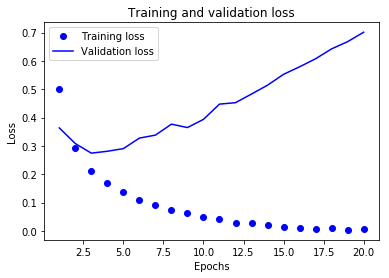

In [10]:
import matplotlib.pyplot as plt
# Capture the accuracy and both the training loss & validation loss at each epoch into a history_dict 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<b>Part 5:</b> Plotting the Training and Validation accuracy results 

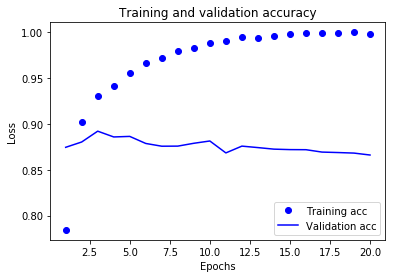

In [15]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# relu activation layers can be changed and retraining after a certain epochs are couple of options to get better results 